
# Regresi Linier - scikit-learn

Contoh di bawah ini hanya menggunakan fitur pertama dari dataset `diabetes`, untuk mengilustrasikan titik data dalam plot dua dimensi. Garis lurus dapat dilihat di plot, menunjukkan bagaimana regresi linier mencoba menggambar garis lurus yang paling baik meminimalkan jumlah kuadrat sisa antara respons yang diamati dalam kumpulan data, dan respons yang diprediksi oleh pendekatan linier.

Instalasi scikit-learn  (sklearn)
```
pip install scikit-learn
pip3 install scikit-learn
```


In [1]:
!pip install scikit-learn

In [2]:
import sklearn
sklearn.__version__

'1.0.1'

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

## Ordinary Least Squares

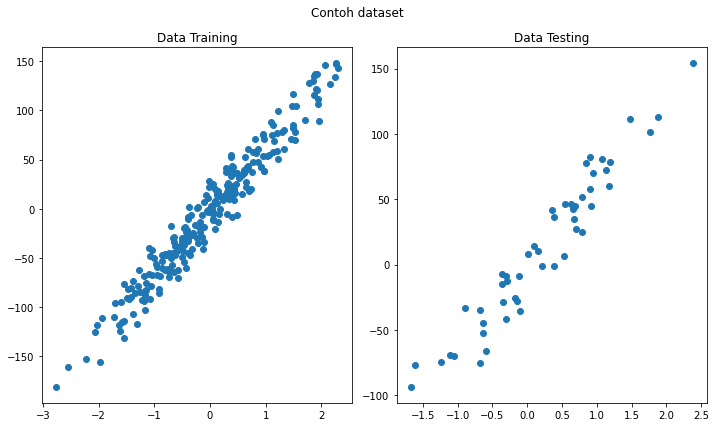

In [62]:
# Menyiapkan data
from sklearn.datasets import make_regression

# buat dataset 300 sample dan 2 features
X_gen, y_gen = make_regression(n_samples=300, n_features=1, noise=15, random_state=0)

# Memisahkan data untuk training/testing
X_gen_train = X_gen[:-50]
X_gen_test = X_gen[-50:]

# Memisahkan target untuk training/testing
y_gen_train = y_gen[:-50]
y_gen_test = y_gen[-50:]

# plot
fig = plt.figure(figsize=(10,6)) 
ax1 = fig.add_subplot(1, 2, 1)   
ax1.scatter(X_gen_train,y_gen_train)
ax1.title.set_text('Data Training')

ax2 = fig.add_subplot(1, 2, 2)   
ax2.scatter(X_gen_test,y_gen_test)
ax2.title.set_text('Data Testing')

fig.suptitle('Contoh dataset')                     
fig.tight_layout(pad=1)
plt.show()

In [5]:
# buat objek linear regression
regr = linear_model.LinearRegression()
print(regr.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


In [6]:
# Train modeldengan training set
regr.fit(X_gen_train,y_gen_train)

# buat prediksi dengan data testing
y_gen_pred = regr.predict(X_gen_test)

# Nilai koefesien The coefficients
print('Coefficients: \n', regr.coef_)
# RMSE
print('RMSE: %.2f'
      % mean_squared_error(y_gen_test, y_gen_pred, squared = False))


Coefficients: 
 [63.79488511]
RMSE: 15.27


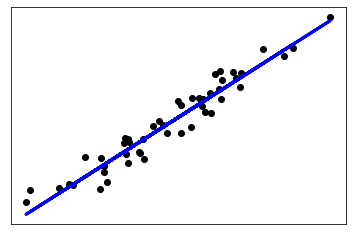

In [7]:
# Plot outputs
plt.scatter(X_gen_test,y_gen_test,  color='black')
plt.plot(X_gen_test, y_gen_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Studi Kasus Diabetes

In [8]:
# baca dataset diabetes 
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X[:10], diabetes_y[:10] # tampilkan 10 data

(array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
         -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
         -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
         -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
        [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
          0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
        [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
          0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087],
        [-0.09269548, -0.04464164, -0.04069594, -0.01944209, -0.06899065,
         -0.07928784,  0.04127682, -0.0763945 , -0.04118039, -0.09634616],
        [-0.04547248,  0.05068012, -0.04716281, -0.01599922, -0.04009564,
         -0.02480001,  0.0007788

In [9]:
# Buat satu fitur
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Memisahkan data untuk training/testing
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Memisahkan target untuk training/testing
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [10]:
# buat objek linear regression
regr = linear_model.LinearRegression()
print(regr.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


In [11]:
# Train modeldengan training set
regr.fit(diabetes_X_train, diabetes_y_train)

# buat prediksi dengan data testing
diabetes_y_pred = regr.predict(diabetes_X_test)

# Nilai koefesien The coefficients
print('Coefficients: \n', regr.coef_)
# RMSE
print('RMSE: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred, squared = False))


Coefficients: 
 [938.23786125]
RMSE: 50.48


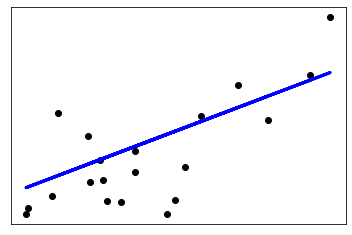

In [12]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Studi Kasus: Iklan

In [13]:
# ambil data
filename = 'datasets/Advertising.csv'
advert=pd.read_csv(filename)
advert.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [14]:
tv = advert['TV'].values.reshape(-1,1)
sales = advert['Sales'].values.reshape(-1,1)

regr2 = linear_model.LinearRegression()

# Train modeldengan training set
regr2.fit(tv, sales)

# buat prediksi dengan data testing
sales_pred = regr2.predict(tv)

# RMSE
print('RMSE: %.2f'
      % mean_squared_error(sales, sales_pred, squared = False))


RMSE: 3.24


Text(0.5, 1.0, 'Predicted Sales vs TV Advertising Costs - OLS')

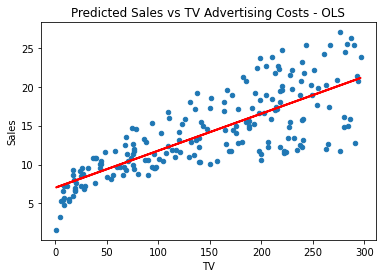

In [15]:
# Plot Penjualan yang diprediksi vs biaya Iklan TV 
advert.plot(kind='scatter', x='TV', y='Sales')
plt.plot(pd.DataFrame(advert['TV']),sales_pred,c='red',linewidth=2)
plt.title('Predicted Sales vs TV Advertising Costs - OLS')


## Bayesian Regression

Teknik regresi bayesian dapat digunakan untuk memasukkan parameter regularisasi dalam prosedur estimasi: parameter regularisasi tidak diatur dalam arti yang sulit tetapi disesuaikan dengan data yang ada. 

Untuk mendapatkan model probabilistik penuh, output $y$ diasumsikan terdistribusi Gaussian di sekitar $X w$:

$
p(y|X,w,\alpha) = \mathcal{N}(y|X w,\alpha)
$

dimana $\alpha$ sebagai variabel acak yang akan diperkirakan dari data. 


Keuntungan dari Regresi Bayesian adalah:
* Itu menyesuaikan dengan data yang ada.
* Ini dapat digunakan untuk memasukkan parameter regularisasi dalam prosedur estimasi.

Kerugian dari regresi Bayesian meliputi:
* Inferensi model dapat memakan waktu. 


In [16]:
regr_bayes1 = linear_model.BayesianRidge()
regr_bayes1.get_params()

{'alpha_1': 1e-06,
 'alpha_2': 1e-06,
 'alpha_init': None,
 'compute_score': False,
 'copy_X': True,
 'fit_intercept': True,
 'lambda_1': 1e-06,
 'lambda_2': 1e-06,
 'lambda_init': None,
 'n_iter': 300,
 'normalize': 'deprecated',
 'tol': 0.001,
 'verbose': False}

In [17]:
# Train model dengan training set
regr_bayes1.fit(X_gen_train,y_gen_train)

# buat prediksi dengan data testing
y_gen_pred = regr_bayes1.predict(X_gen_test)

# RMSE
print('RMSE: %.2f'
      % mean_squared_error(y_gen_test, y_gen_pred, squared = False))

RMSE: 15.27


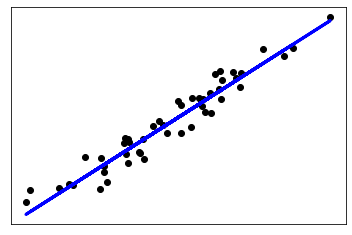

In [18]:
# Plot outputs
plt.scatter(X_gen_test,y_gen_test,  color='black')
plt.plot(X_gen_test, y_gen_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Studi Kasus Diabetes

In [19]:
# buat objek bayesian regression
regr_bayes2 = linear_model.BayesianRidge()
regr_bayes2.get_params()

{'alpha_1': 1e-06,
 'alpha_2': 1e-06,
 'alpha_init': None,
 'compute_score': False,
 'copy_X': True,
 'fit_intercept': True,
 'lambda_1': 1e-06,
 'lambda_2': 1e-06,
 'lambda_init': None,
 'n_iter': 300,
 'normalize': 'deprecated',
 'tol': 0.001,
 'verbose': False}

In [20]:
# Train model dengan training set
regr_bayes2.fit(diabetes_X_train, diabetes_y_train)

# buat prediksi dengan data testing
diabetes_y_pred = regr_bayes2.predict(diabetes_X_test)

# Nilai koefesien The coefficients
print('Coefficients: \n', regr_bayes2.coef_)
# RMSE
print('RMSE: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred, squared = False))

Coefficients: 
 [933.81653338]
RMSE: 50.53


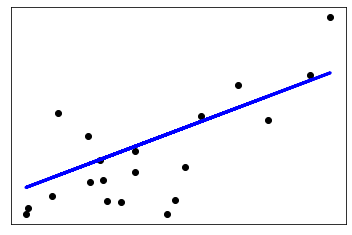

In [21]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Studi Kasus Iklan

RMSE: 3.24


Text(0.5, 1.0, 'Predicted Sales vs TV Advertising Costs - Bayesian Regression')

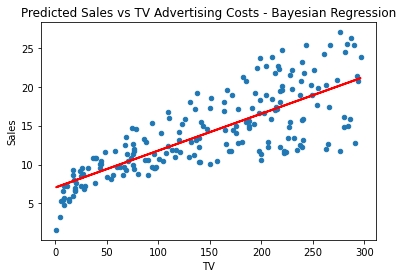

In [22]:
# Studi Kasus Iklan
tv = advert['TV'].values.reshape(-1,1)
sales = advert['Sales'].values.reshape(-1,1)

regr_bayes3 = linear_model.BayesianRidge()
# Train model dengan training set
regr_bayes3.fit(tv, sales.ravel())

# buat prediksi dengan data testing
sales_pred = regr_bayes3.predict(tv)

# RMSE
print('RMSE: %.2f'
      % mean_squared_error(sales, sales_pred, squared = False))

# Plot Penjualan yang diprediksi vs biaya Iklan TV 
advert.plot(kind='scatter', x='TV', y='Sales')
plt.plot(pd.DataFrame(advert['TV']),sales_pred,c='red',linewidth=2)
plt.title('Predicted Sales vs TV Advertising Costs - Bayesian Regression')


## Support Vector Machine (SVM) Regression

**Linear Support Vector Regression**

Mirip dengan SVR dengan parameter kernel='linier', tetapi diimplementasikan dalam bentuk liblinear daripada libsvm, sehingga memiliki lebih banyak fleksibilitas dalam pilihan fungsi penalti dan kerugian dan harus diskalakan lebih baik ke sejumlah besar sampel. 

Implementasi **LinearSVR** menggunakan liblinear.

In [23]:
# buat objek SVM regression
from sklearn import svm
regr_svm1 = svm.LinearSVR()
regr_svm1.get_params()

{'C': 1.0,
 'dual': True,
 'epsilon': 0.0,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'loss': 'epsilon_insensitive',
 'max_iter': 1000,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [24]:
# Train modeldengan training set
regr_svm1.fit(X_gen_train,y_gen_train)

# buat prediksi dengan data testing
y_gen_pred = regr_svm1.predict(X_gen_test)

# Nilai koefesien The coefficients
print('Coefficients: \n', regr_svm1.coef_)
# RMSE
print('RMSE: %.2f'
      % mean_squared_error(y_gen_test, y_gen_pred, squared = False))

Coefficients: 
 [59.09609729]
RMSE: 15.61


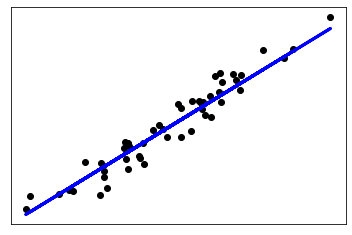

In [25]:
# Plot outputs
plt.scatter(X_gen_test,y_gen_test,  color='black')
plt.plot(X_gen_test, y_gen_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Studi Kasus Diabetes

In [27]:
# buat objek SVM regression
from sklearn import svm
regr_svm2 = svm.LinearSVR()
regr_svm2.get_params()

{'C': 1.0,
 'dual': True,
 'epsilon': 0.0,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'loss': 'epsilon_insensitive',
 'max_iter': 1000,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [28]:
# Train model dengan training set
regr_svm2.fit(diabetes_X_train, diabetes_y_train)

# buat prediksi dengan data testing
diabetes_y_pred = regr_svm2.predict(diabetes_X_test)

# Nilai koefesien The coefficients
print('Coefficients: \n', regr_svm2.coef_)
# RMSE
print('RMSE: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred, squared = False))

Coefficients: 
 [8.47432739]
RMSE: 71.25


In [29]:
# buat objek SVM regression dengan loss='squared_epsilon_insensitive'
regr_svm3 = svm.LinearSVR(loss='squared_epsilon_insensitive')
print(regr_svm3.get_params())

# Train model dengan training set
regr_svm3.fit(diabetes_X_train, diabetes_y_train)

# buat prediksi dengan data testing
diabetes_y_pred2 = regr_svm3.predict(diabetes_X_test)

# Nilai koefesien The coefficients
print('Coefficients: \n', regr_svm3.coef_)
# RMSE
print('RMSE: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred2, squared = False))

{'C': 1.0, 'dual': True, 'epsilon': 0.0, 'fit_intercept': True, 'intercept_scaling': 1.0, 'loss': 'squared_epsilon_insensitive', 'max_iter': 1000, 'random_state': None, 'tol': 0.0001, 'verbose': 0}
Coefficients: 
 [615.99596378]
RMSE: 56.01


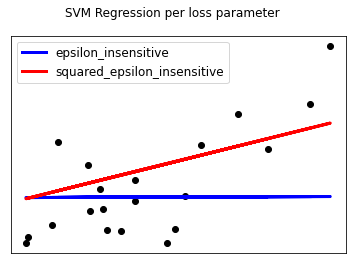

In [30]:
# Plot outputs
fig, ax = plt.subplots()

ax.scatter(diabetes_X_test, diabetes_y_test,  color='black')

ax.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3, label='epsilon_insensitive')
ax.plot(diabetes_X_test, diabetes_y_pred2, color='red', linewidth=3, label='squared_epsilon_insensitive')

ax.legend(loc='best', prop={'size':'large'}) 

fig.suptitle('SVM Regression per loss parameter')

plt.xticks(())
plt.yticks(())

plt.show()

### Studi Kasus Iklan

{'C': 1.0, 'dual': True, 'epsilon': 0.0, 'fit_intercept': True, 'intercept_scaling': 1.0, 'loss': 'epsilon_insensitive', 'max_iter': 500000, 'random_state': None, 'tol': 0.0001, 'verbose': 0}
RMSE: 3.28


Text(0.5, 1.0, 'Predicted Sales vs TV Advertising Costs - SVM Regression')

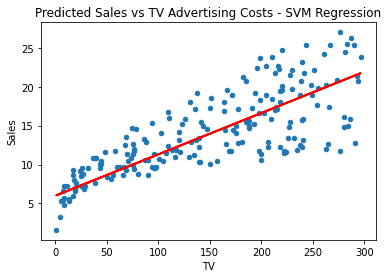

In [34]:
# Studi kasus Iklan
# ambil data
from sklearn import svm
import sklearn

filename = 'datasets/Advertising.csv'
advert=pd.read_csv(filename)

tv = advert['TV'].values.reshape(-1,1)
sales = advert['Sales'].values.reshape(-1,1)

# linear SVM
regr_svm4 = svm.LinearSVR(max_iter=500000)
print(regr_svm4.get_params())

# Train modeldengan training set
regr_svm4.fit(tv, sales.ravel())

# buat prediksi dengan data testing
sales_pred = regr_svm4.predict(tv)

# RMSE
print('RMSE: %.2f'
      % mean_squared_error(sales, sales_pred, squared = False))

# Plot Penjualan yang diprediksi vs biaya Iklan TV 
advert.plot(kind='scatter', x='TV', y='Sales')
plt.plot(pd.DataFrame(advert['TV']),sales_pred,c='red',linewidth=2)
plt.title('Predicted Sales vs TV Advertising Costs - SVM Regression')

## Stochastic Gradient Descent (SGD) Regression

Gradient Descent adalah algoritma optimasi yang sangat umum yang mampu menemukan solusi optimal untuk berbagai masalah. Gagasan umum Gradient Descent adalah mengubah parameter secara iteratif untuk meminimalkan fungsi biaya. 

Stochastic Gradient Descent hanya memilih instance acak dalam set pelatihan di setiap langkah dan menghitung gradien hanya berdasarkan instance tunggal itu. Jelas ini membuat algoritme lebih cepat karena memiliki sedikit data untuk dimanipulasi pada setiap iterasi.

Implementasi menggunakan SGDRegressor pada scikit-learn.

SGDRegressor dapat mengoptimalkan fungsi biaya yang sama dengan LinearSVR dengan menyesuaikan parameter penalti dan kerugian. Selain itu membutuhkan lebih sedikit memori, memungkinkan pembelajaran inkremental (online), dan menerapkan berbagai fungsi kerugian dan rezim regularisasi. 

SGDRegressor sangat cocok untuk masalah regresi dengan sejumlah besar sampel pelatihan (> 10.000). loss parameter
* loss="squared_error": Ordinary least squares,
* loss="huber": Huber loss for robust regression,
* loss="epsilon_insensitive": linear Support Vector Regression.

In [35]:
# buat objek SGD regression
regr_sgd1 = linear_model.SGDRegressor()
regr_sgd1.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [36]:
# Train model dengan training set
regr_sgd1.fit(X_gen_train,y_gen_train)

# buat prediksi dengan data testing
y_gen_pred = regr_sgd1.predict(X_gen_test)

# RMSE
print('RMSE: %.2f'
      % mean_squared_error(y_gen_test, y_gen_pred, squared = False))

RMSE: 15.27


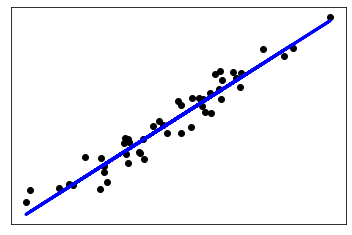

In [37]:
# Plot outputs
plt.scatter(X_gen_test,y_gen_test,  color='black')
plt.plot(X_gen_test, y_gen_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Studi Kasus Diabetes

In [38]:
# buat objek SGD regression
regr_sgd2 = linear_model.SGDRegressor(max_iter=500000)
regr_sgd2.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 500000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [39]:
# Train modeldengan training set
regr_sgd2.fit(diabetes_X_train, diabetes_y_train)

# buat prediksi dengan data testing
diabetes_y_pred = regr_sgd2.predict(diabetes_X_test)

# Nilai koefesien The coefficients
print('Coefficients: \n', regr_sgd2.coef_)
# RMSE
print('RMSE: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred, squared = False))

Coefficients: 
 [723.53156009]
RMSE: 53.81


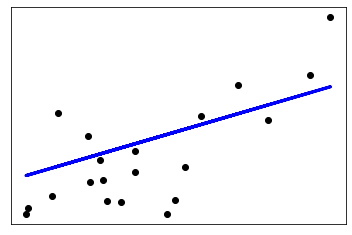

In [40]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Studi Kasus Iklan

{'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'huber', 'max_iter': 10000, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
{'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'huber', 'max_iter': 10000, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
RMSE: 4.74


Text(0.5, 1.0, 'Predicted Sales vs TV Advertising Costs - SGD Regression')

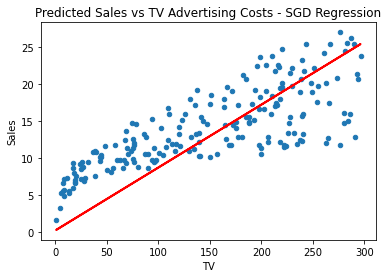

In [43]:
# Studi kasus Iklan
# ambil data
from sklearn import svm
import sklearn

filename = 'datasets/Advertising.csv'
advert=pd.read_csv(filename)

tv = advert['TV'].values.reshape(-1,1)
sales = advert['Sales'].values.reshape(-1,1)

# SGD
regr_sgd3 = linear_model.SGDRegressor(loss="huber", max_iter=10000)
# regr_sgd3 = linear_model.SGDRegressor( max_iter=10000)
print(regr_sgd3.get_params())

# Train modeldengan training set
regr_sgd3.fit(tv, sales.ravel())
print(regr_sgd3.get_params())

# buat prediksi dengan data testing
sales_pred = regr_sgd3.predict(tv)


# RMSE
print('RMSE: %.2f'
      % mean_squared_error(sales, sales_pred, squared = False))

# Plot Penjualan yang diprediksi vs biaya Iklan TV 
advert.plot(kind='scatter', x='TV', y='Sales')
plt.plot(pd.DataFrame(advert['TV']),sales_pred,c='red',linewidth=2)
plt.title('Predicted Sales vs TV Advertising Costs - SGD Regression')

## Nearest Neighbors Regression

Regresi berdasarkan k-nearest tetangga.

Target diprediksi dengan interpolasi lokal dari target yang terkait dengan tetangga terdekat di set pelatihan. 

![](figs/KNN_similarity.png "Fungsi jarak")

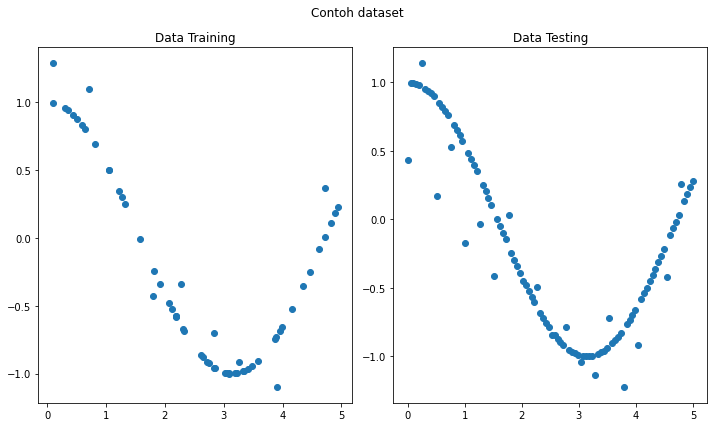

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
%matplotlib inline

np.random.seed(0)
X = np.sort(5 * np.random.rand(60, 1), axis=0)
T = np.linspace(0, 5, 100)[:, np.newaxis]
y = np.cos(X).ravel()
y_test = np.cos(T).ravel()

# tambah noise pada target
y[::8] += 1 * (0.45 - np.random.rand(8))
y_test[::5] += 1 * (0.27 - np.random.rand(20))

# plot
fig = plt.figure(figsize=(10,6))  
ax1 = fig.add_subplot(1, 2, 1)   
ax1.scatter(X,y)
ax1.title.set_text('Data Training')

ax2 = fig.add_subplot(1, 2, 2)   
ax2.scatter(T,y_test)
ax2.title.set_text('Data Testing')

fig.suptitle('Contoh dataset')                     
fig.tight_layout(pad=1)
plt.show()


weights = 'uniform' RMSE: 0.17
weights = 'distance' RMSE: 0.16


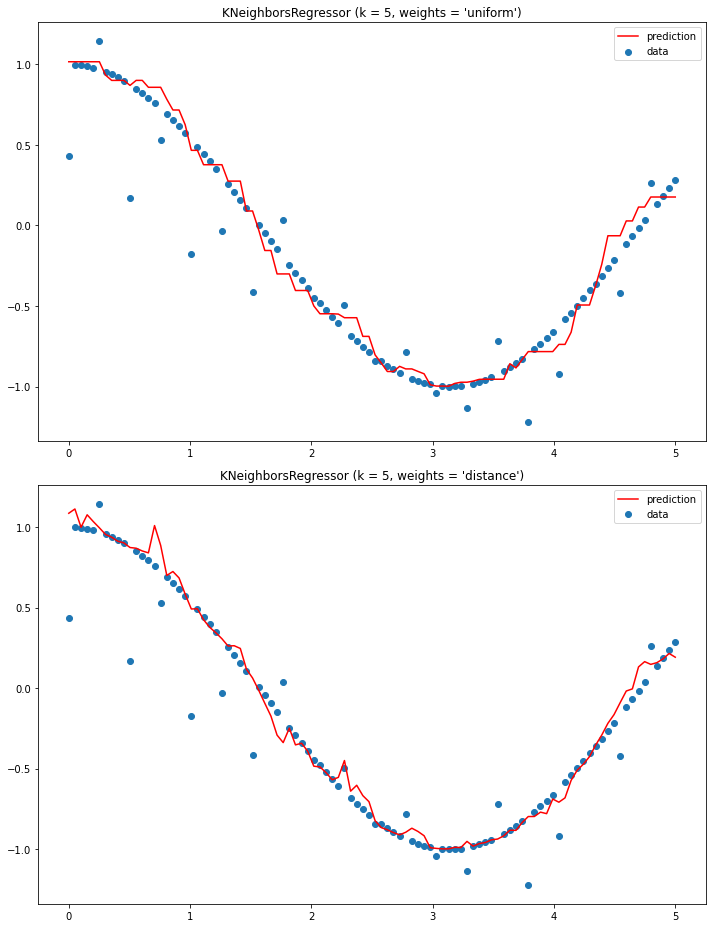

In [56]:
n_neighbors = 5
fig = plt.figure(figsize=(10,13)) 
for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_pred = knn.fit(X, y).predict(T)
    
    # RMSE
    print("weights = '%s' RMSE: %.2f" % (weights, mean_squared_error(y_test, y_pred, squared = False)))

    plt.subplot(2, 1, i + 1)
    plt.scatter(T, y_test, label="data")
    plt.plot(T, y_pred, color="red", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

## Ridge Regression

Ridge regression membahas beberapa masalah Ordinary Least Squares (OLS) dengan mengenakan penalti pada ukuran koefisien. Koefisien ridge meminimalkan jumlah sisa kuadrat yang dihukum: 
$$
\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2
$$


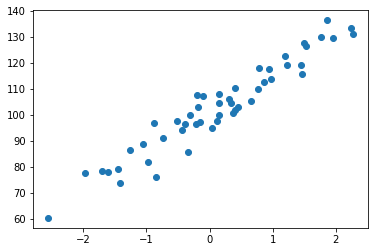

In [57]:
# menyiapkan dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
%matplotlib inline

X, y = make_regression(
    n_samples=50, n_features=1, random_state=0, noise=6, bias=100.0
)

plt.scatter(X, y)

{'alpha': 0.5, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
RMSE: 4.81


Text(0.5, 1.0, 'Ridge Regression')

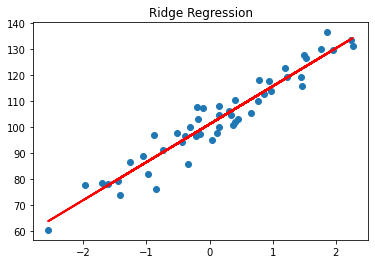

In [58]:
from sklearn import linear_model

# buat model dan training
reg = linear_model.Ridge(alpha=0.5)
reg.fit(X, y)
print(reg.get_params())

# buat prediksi dengan data testing
y_pred = reg.predict(X)

# RMSE
print('RMSE: %.2f' % mean_squared_error(y, y_pred, squared = False))

# Plot 
plt.scatter(X, y)
plt.plot(X,y_pred,c='red',linewidth=2)
plt.title('Ridge Regression')

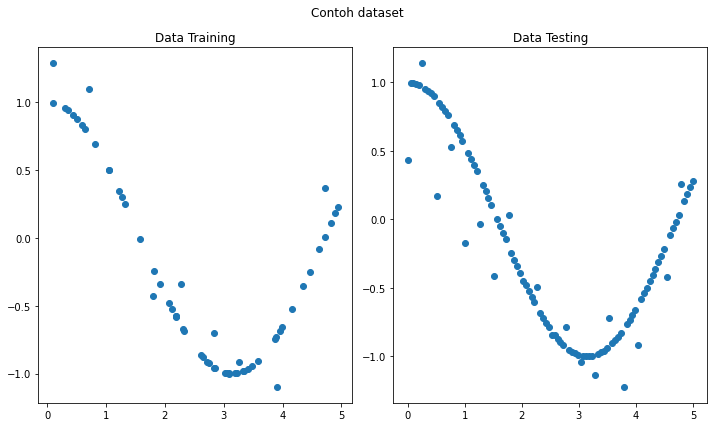

In [59]:
# test data Ridge pada data cos
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
%matplotlib inline

np.random.seed(0)
X = np.sort(5 * np.random.rand(60, 1), axis=0)
T = np.linspace(0, 5, 100)[:, np.newaxis]
y = np.cos(X).ravel()
y_test = np.cos(T).ravel()

# tambah noise pada target
y[::8] += 1 * (0.45 - np.random.rand(8))
y_test[::5] += 1 * (0.27 - np.random.rand(20))

# plot
fig = plt.figure(figsize=(10,6)) 
ax1 = fig.add_subplot(1, 2, 1)   
ax1.scatter(X,y)
ax1.title.set_text('Data Training')

ax2 = fig.add_subplot(1, 2, 2)   
ax2.scatter(T,y_test)
ax2.title.set_text('Data Testing')

fig.suptitle('Contoh dataset')                     
fig.tight_layout(pad=1)
plt.show()

{'alpha': 0.5, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
RMSE: 0.51


Text(0.5, 1.0, 'Ridge Regression')

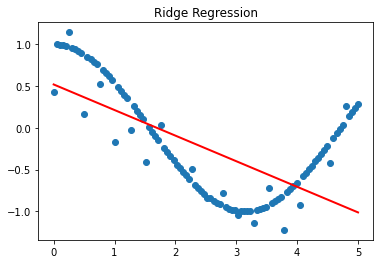

In [60]:
from sklearn import linear_model

# buat model dan training
reg = linear_model.Ridge(alpha=0.5)
reg.fit(X, y)
print(reg.get_params())

# buat prediksi dengan data testing
y_pred = reg.predict(T)

# RMSE
print('RMSE: %.2f' % mean_squared_error(y_test, y_pred, squared = False))

# Plot 
plt.scatter(T, y_test)
plt.plot(T,y_pred,c='red',linewidth=2)
plt.title('Ridge Regression')

## Decision Trees Regression

Decision tree juga dapat diterapkan pada masalah regresi, dengan menggunakan kelas ```DecisionTreeRegressor```.

Seperti dalam pengaturan klasifikasi, metode fit akan mengambil sebagai array argumen X dan y, hanya saja dalam hal ini y diharapkan memiliki nilai floating point alih-alih nilai integer.

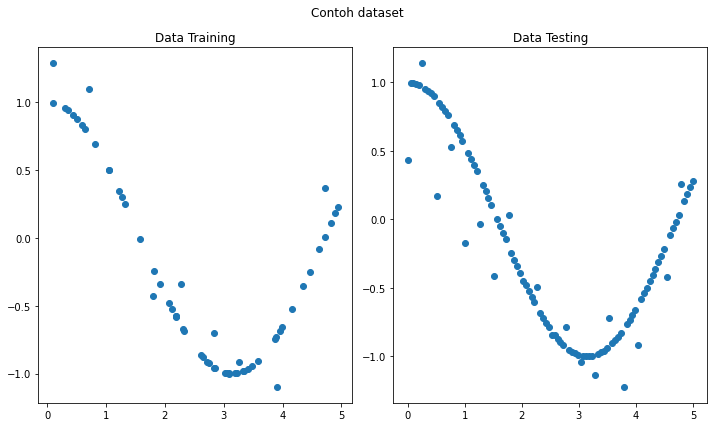

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline

np.random.seed(0)
X = np.sort(5 * np.random.rand(60, 1), axis=0)
T = np.linspace(0, 5, 100)[:, np.newaxis]
y = np.cos(X).ravel()
y_test = np.cos(T).ravel()

# tambah noise pada target
y[::8] += 1 * (0.45 - np.random.rand(8))
y_test[::5] += 1 * (0.27 - np.random.rand(20))

# plot
fig = plt.figure(figsize=(10,6)) 
ax1 = fig.add_subplot(1, 2, 1)   
ax1.scatter(X,y)
ax1.title.set_text('Data Training')

ax2 = fig.add_subplot(1, 2, 2)   
ax2.scatter(T,y_test)
ax2.title.set_text('Data Testing')

fig.suptitle('Contoh dataset')                     
fig.tight_layout(pad=1)
plt.show()

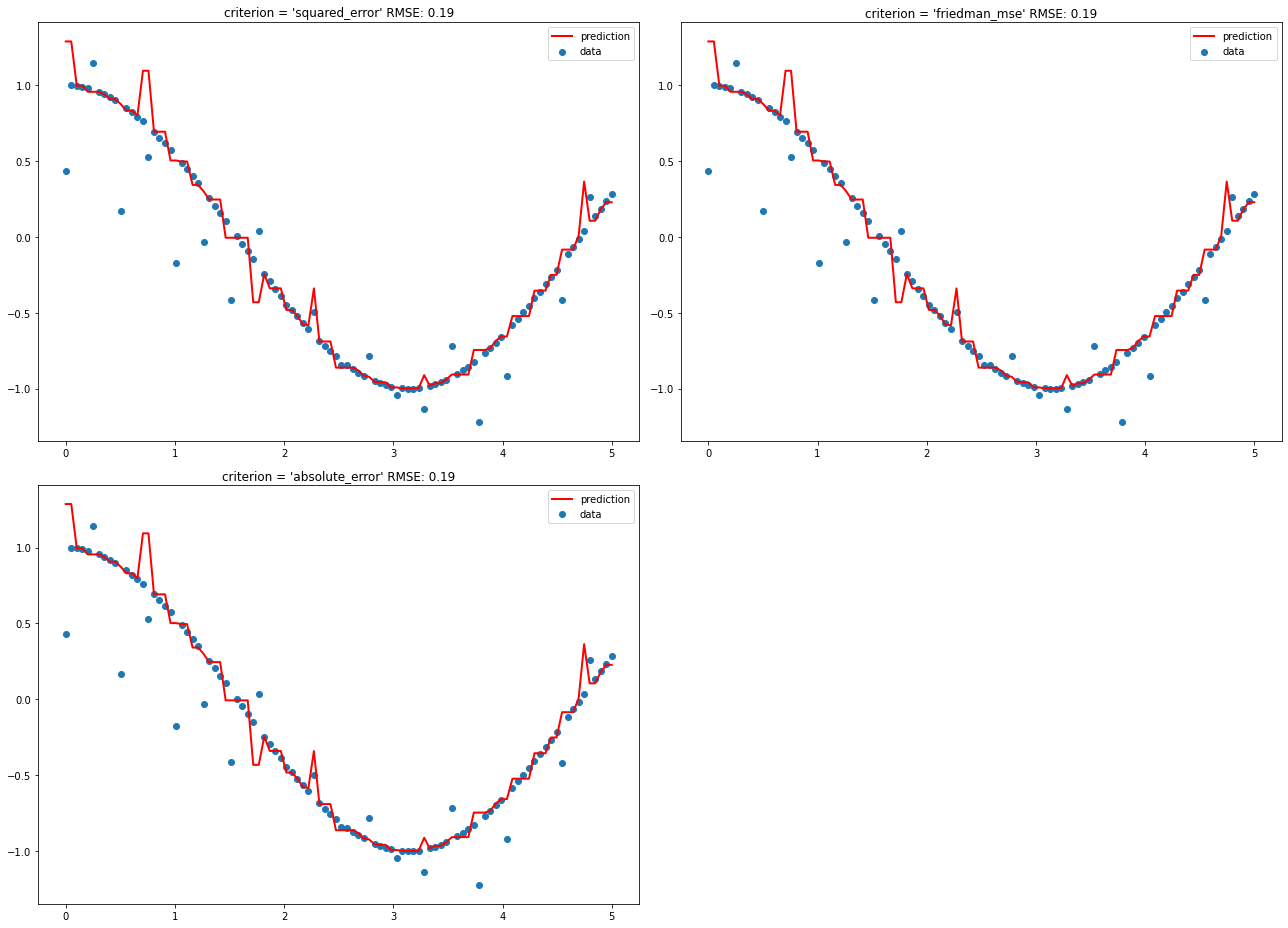

In [62]:
fig = plt.figure(figsize=(18,13)) 
for i, criterion in enumerate(["squared_error", "friedman_mse", "absolute_error"]):
    clf = tree.DecisionTreeRegressor(criterion=criterion)
    y_pred = clf.fit(X, y).predict(T)
    
    # RMSE
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    
    ax = fig.add_subplot(2, 2, i + 1)
    ax.scatter(T, y_test, label="data")
    ax.plot(T, y_pred, color="red", lw=2,label="prediction")
    ax.axis("tight")
    ax.title.set_text("criterion = '%s' RMSE: %.2f" % (criterion, rmse))
    ax.legend(loc='best') 
    
plt.tight_layout()
plt.show()